# 机器学习之K-均值算法

#### 【简介】

**K-均值**（k-means）算法是属于机器学习中的非监督学习算法，最经典的聚类算法，其原理非常简单，是一种典型的**基于距离**的聚类算法。

聚类算法中，将**相似**的数据划分为一个集合，一个集合称为一个**簇**（Cluster）。 k-均值（k-means）聚类，顾名思义，它可以发现**k个簇**，且每个**簇的中心**采用簇中所含值的**均值**计算而成。

#### 【目录】

1. [距离度量](#1.-距离度量)
2. [什么是质心](#2.-什么是质心)
3. [K-均值算法流程](#3.-K-均值算法流程)
4. [sklearn中的K-均值模型](#4.-sklearn中的K-均值模型)

## 1. 距离度量

### 任务描述

使用Python编写一个能计算样本间**欧式距离**与**曼哈顿距离**的函数。

### 相关知识

为了完成本任务，需要掌握：

1. 欧氏距离
2. 曼哈顿距离

#### 欧氏距离

**欧氏距离**是最容易直观理解的距离度量方法，我们小学、初中和高中接触到的两个点在空间中的距离一般都是指欧氏距离。

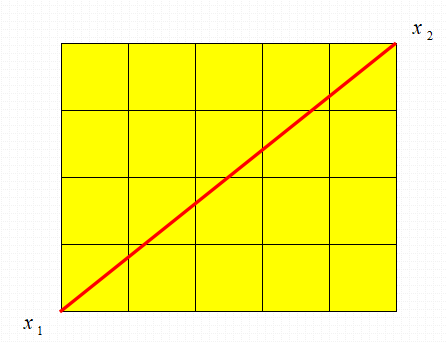

**二维**平面上点$a(x_1, y_1), b(x_2, y_2)$间的欧式距离：

$$
d_{a,b} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 }
$$

**三维**空间点$a(x_1, y_1, z_1), b(x_2, y_2, z_2)$间的欧式距离

$$
d_{a,b} = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}
$$

**n维**空间点（n维向量）$a(x_{11}, x_{12}, \cdots, x_{1n}, b(x_{21}, x_{22}, \cdots, x_{2n}$间的欧式距离：

$$
d_{a,b} = \sqrt{\sum_{k=1}^n(x_{1k} - x_{2k})^2}
$$

#### 曼哈顿距离

顾名思义，在曼哈顿街区要从一个十字路口开车到另一个十字路口，驾驶距离显然不是两点间的直线距离。这个实际驾驶距离就是“曼哈顿距离”。曼哈顿距离也称为“城市街区距离”。

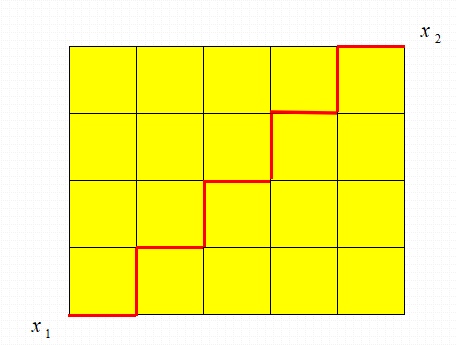

### 实操练习

#### 编程要求

请仔细阅读下列，结合相关知识，在`Begin-End`区域内进行代码补充，使用Python编写一个能计算样本间**欧式距离**与**曼哈顿距离**的方法。

#### 测试说明

测试输入：`{'a1':[1, 1], 'b1':[4, 5], 'a2':[5, 7], 'b2':[10, 19]}`

预期输出：
```
a1,b1的曼哈顿距离为：7.00
a2,b2的曼哈顿距离为：17.00
a1,b1的欧式距离为：5.00
a2,b2的欧式距离为：13.00
```

In [1]:
import numpy as np

def distance(x, y, p=2):
    '''
    input:x(ndarray):第一个样本的坐标
          y(ndarray):第二个样本的坐标
          p(int):等于1时为曼哈顿距离，等于2时为欧氏距离
    output:distance(float):x到y的距离      
    ''' 
    #********* Begin *********#
    dis2 = np.sum(np.abs(x - y) ** p)
    dis = np.power(dis2, 1 / p)
    return dis
    #********* End *********#

In [6]:
# 测试代码
input_data = {'a1':[1, 1], 'b1':[4, 5], 'a2':[5, 7], 'b2':[10, 19]}

print('a1,b1的曼哈顿距离为：{:.2f}'.format(
    distance(np.array(input_data['a1']),np.array(input_data['b1']), 1)
))
print('a2,b2的曼哈顿距离为：{:.2f}'.format(
    distance(np.array(input_data['a2']),np.array(input_data['b2']), 1)
))
print('a1,b1的欧式距离为：{:.2f}'.format(
    distance(np.array(input_data['a1']),np.array(input_data['b1']))
))
print('a2,b2的欧式距离为：{:.2f}'.format(
    distance(np.array(input_data['a2']),np.array(input_data['b2']))
))

a1,b1的曼哈顿距离为：7.00
a2,b2的曼哈顿距离为：17.00
a1,b1的欧式距离为：5.00
a2,b2的欧式距离为：13.00


## 2. 什么是质心

### 任务描述

使用Python编写一个能计算质心的函数，同时计算每个样本到质心的距离，并按照从小到大排序。

### 相关知识

为了完成本任务，需要掌握：

1. 什么是质心

#### 什么是质心

**n维**空间中多个点的**质心**就是这几个点**坐标的平均值**。因此，质心的计算非常简单，对于**n维**空间中的$m$个点（n维向量）$x_1 = (x_{11}, x_{12}, \cdots, x_{1n}), x_2 = (x_{21}, x_{22}, \cdots, x_{2n}), \cdots, x_m = (x_{m1}, x_{m2}, \cdots x_{mn})$, 其质心为：

$$
x_{c} = \frac{1}{m} \sum_{i=1}^m x_i = (\frac{1}{m} \sum_{i=1}^m x_{i1}, \frac{1}{m} \sum_{i=1}^m x_{i2}, \cdots, \frac{1}{m} \sum_{i=1}^m x_{in})
$$

### 实操练习

#### 编程要求

补充`Begin-End`区域内的代码，完成质心和样本到质心距离的计算并排序。

#### 测试说明

测试输入：`[[1, 1],[4, 5],[5, 7],[10, 19]]`

预期输出：`[1.0, 3.1623, 8.0623, 12.0830]`

In [10]:
#计算质心
def cal_cmass(data):
    '''
    input:data(ndarray):数据样本
    output:mass(ndarray):数据样本质心
    '''
    #********* Begin *********#
    Cmass = np.mean(data, axis=0)
    #********* End *********#
    return Cmass

#计算每个样本到质心的距离，并按照从小到大的顺序排列
def sorted_dist(data, cmass):
    '''
    input:data(ndarray):数据样本
          Cmass(ndarray):数据样本质心
    output:dis_list(list):排好序的样本到质心距离
    '''
    #********* Begin *********#
    dis_list = []
    for i in range(len(data)):
        dis_list.append(distance(cmass,data[i][:]))
    dis_list = sorted(dis_list)
    #********* End *********#
    return dis_list

In [12]:
# 测试代码
input_data = [[1, 1],[4, 5],[5, 7],[10, 19]]
# 计算质心
cmass = cal_cmass(np.array(input_data))
# 距离排序
print(sorted_dist(np.array(input_data), cmass))

[1.0, 3.1622776601683795, 8.06225774829855, 12.083045973594572]


## 3. K-均值算法流程

### 任务描述

使用Python实现K-均值算法，并根据红酒的13个特征对红酒数据进行聚类。

### 相关知识

为了完成本任务，需要掌握：

1. K-均值算法原理
2. k-均值算法流程 
3. 如何确定k的值

#### K-均值算法原理

**K-均值**算法根据聚类中心以及被分配到每个聚类中的样本，通过最小化如下代价函数来决定聚类结果。K-均值算法的代价函数的计算公式如下：

$$
J = \sum_{i=1}^K \sum_{i \in C_k} \left\|x_i - \mu_k \right\|^2
$$

其中，$\mu_k$表示聚类$C_k$的中心。此代价函数对所有聚类的偏差求和。每个聚类的偏差等于其包含的所有样本与其质心之间距离的平方和。对于紧凑的聚类，偏差较小，而对于分散的聚类，偏差较大。不断迭代移动聚类中心，以最小化此代价函数便可最终将样本（实例）分配到合适的聚类中。

#### K-均值算法流程

K-均值算法的过程是一个迭代移动聚类中心到聚类实例的均值位置（质心），并找出离聚类中心最近的实例重新聚类的过程。过程如下：

1. 首先，初始化聚类的中心，通常由随机选取的实例作为初始值
2. 在每次迭代中，算法将实例（样本）分配到与其聚类最近的聚类中，然后移动聚类中心到目前该聚类中所有实例（样本）的均值位置（质心）。
3. 直到上述代价函数收敛到某个最小值（满足某些停止标准）。

#### 如何确定k的值

k是一个代表聚类数量的超参数。K-均值算法会自动地将观察实例分配到不同的聚类中，但无法决定合适的聚类数量。k必须是一个正整数，值要小于训练集中实例的数量。有时候聚类的数量可**通过**聚类问题的具体**场景来定**，有时候则需要借助某种启发式的方法去**估计**一个**最优聚类数量**，如**肘部方法**。

如果k值不能由问题的具体场景确定，最优的聚类数量可以使用一种称为**肘部方法**的技术来估计。肘部方法使用不同的k值绘制出代价函数的值。随着k值的增加，平均偏差也会增加，每个聚类将包含更少的实例，同时实例也将更靠近各自对应的质心。然而，随着k值的增加，对平均偏差的提升将会减少。偏差的提升变化下降最陡时的k值称为**肘部**。

下面使用肘部方法为一个数据集选择聚类的数量。下面代码绘制的散点图显示了一个明显可以分为两个聚类的数据集，并计算和绘制出当k从1变化到10时聚类的平均偏差。

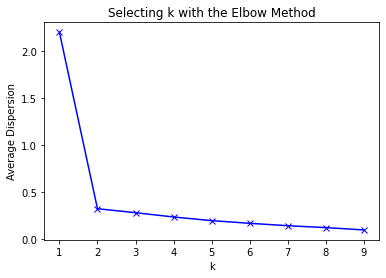

In [15]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))
c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))

x = np.hstack((c1x, c2x))
y = np.hstack((c1y, c2y))
X = np.vstack((x, y)).T

K = range(1, 10)

mean_dispersions = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    mean_dispersions.append(
        sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    )
    
plt.plot(K, mean_dispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')

plt.title('Selecting k with the Elbow Method')
plt.show()

可见，肘部的k值为2，说明此方法帮我们选择了正确的k值。

#### 数据集介绍

数据集为一份红酒数据，一共有178个样本，每个样本有13个特征，这里不提供你红酒的标签，需要根据这13个特征对红酒进行聚类。

`sklearn`中已经提供了红酒数据集的相关接口，可通过sklearn.datasets的load_wine()函数加载。

### 实操练习

#### 编程要求

请仔细阅读下列代码，结合相关知识，在`Begin-End`区域内进行代码补充，完成使用Python实现K-均值算法的任务。

#### 测试说明

输出聚类的吻合度，应高于0.95

In [17]:
import numpy as np

# 计算一个样本与数据集中所有样本的欧氏距离的平方
def euclidean_distance(one_sample, X):
    one_sample = one_sample.reshape(1, -1)
    distances = np.power(np.tile(one_sample, (X.shape[0], 1)) - X, 2).sum(axis=1)
    return distances

class Kmeans():
    """Kmeans聚类算法.
    Parameters:
    -----------
    k: int
        聚类的数目.
    max_iterations: int
        最大迭代次数. 
    varepsilon: float
        判断是否收敛, 如果上一次的所有k个聚类中心与本次的所有k个聚类中心的差都小于varepsilon, 
        则说明算法已经收敛
    """
    def __init__(self, k=2, max_iterations=500, varepsilon=0.0001):
        self.k = k
        self.max_iterations = max_iterations
        self.varepsilon = varepsilon
        np.random.seed(1)
    #********* Begin *********#
    # 从所有样本中随机选取self.k样本作为初始的聚类中心
    def init_random_centroids(self, X):
        n_samples, n_features = np.shape(X)
        centroids = np.zeros((self.k, n_features))
        for i in range(self.k):
            centroid = X[np.random.choice(range(n_samples))]
            centroids[i] = centroid
        return centroids
    
    # 返回距离该样本最近的一个中心索引[0, self.k)
    def _closest_centroid(self, sample, centroids):
        distances = euclidean_distance(sample, centroids)
        closest_i = np.argmin(distances)
        return closest_i
    
    # 将所有样本进行归类，归类规则就是将该样本归类到与其最近的中心
    def create_clusters(self, centroids, X):
        clusters = [[] for _ in range(self.k)]
        for sample_i, sample in enumerate(X):
            centroid_i = self._closest_centroid(sample, centroids)
            clusters[centroid_i].append(sample_i)
        return clusters
    
    # 对中心进行更新
    def update_centroids(self, clusters, X):
        n_features = np.shape(X)[1]
        centroids = np.zeros((self.k, n_features))
        for i, cluster in enumerate(clusters):
            centroid = np.mean(X[cluster], axis=0)
            centroids[i] = centroid
        return centroids
    
    # 将所有样本进行归类，其所在的类别的索引就是其类别标签
    def get_cluster_labels(self, clusters, X):
        y_pred = np.zeros(np.shape(X)[0])
        for cluster_i, cluster in enumerate(clusters):
            for sample_i in cluster:
                y_pred[sample_i] = cluster_i
        return y_pred
    
    # 对整个数据集X进行Kmeans聚类，返回其聚类的标签
    def predict(self, X):
        # 从所有样本中随机选取self.k样本作为初始的聚类中心
        centroids = self.init_random_centroids(X)
        # 迭代，直到算法收敛(上一次的聚类中心和这一次的聚类中心几乎重合)或者达到最大迭代次数
        for _ in range(self.max_iterations):
            # 将所有进行归类，归类规则就是将该样本归类到与其最近的中心
            clusters = self.create_clusters(centroids, X)
            former_centroids = centroids
            # 计算新的聚类中心
            centroids = self.update_centroids(clusters, X)
            # 如果聚类中心几乎没有变化，说明算法已经收敛，退出迭代
            diff = centroids - former_centroids
            if diff.any() < self.varepsilon:
                break
        return self.get_cluster_labels(clusters, X)
    #********* End *********#

In [33]:
# 测试代码
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine

# 加载数据
wine = load_wine()
# 标准化
scaler = StandardScaler()
X = scaler.fit_transform(wine.data)
y = wine.target
# 创建聚类模型
km = Kmeans(k=3)
y_pred = km.predict(X)
# 计算吻合度
acc = accuracy_score(y, y_pred)
print('聚类的吻合度：{:.2f}'.format(acc))

聚类的吻合度：0.35


In [34]:
y_pred = y_pred.astype(int)

In [35]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

由于聚类标签和实际标签ID不同，导致聚类吻合度计算错误。现将标签统一化再进行评估打分。

In [36]:
y[y == 0] = -1
y[y == 1] = -2
y[y == 2] = -3
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3])

In [37]:
y_pred[y_pred == 0] = -1
y_pred[y_pred == 2] = -2
y_pred[y_pred == 1] = -3
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -3, -2, -2, -2, -2, -2, -2,
       -2, -1, -2, -2, -2, -1, -2, -2, -2, -2, -1, -2, -2, -2, -2, -3, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3,
       -2, -2, -1, -2, -2, -2, -2, -2, -2, -2, -2, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3])

In [38]:
acc = accuracy_score(y, y_pred)
print('聚类的吻合度：{:.2f}'.format(acc))

聚类的吻合度：0.96


## 4. sklearn中的K-均值模型

### 任务描述

调用sklearn中的K-均值模型KMeans，对红酒数据进行聚类。

### 相关知识

为了完成本任务，需要掌握：

1. KMeans

#### KMeans

`sklearn`中`KMeans`的构造函数中有以下三个常用的参数可以设置：

- `n_clusters`：将数据聚成`n_clusters`个类
- `max_iter`：最大迭代次数，默认值为300
- `tol`：停止收敛（迭代）的阈值，默认为1e-4

`KMeans`类中的`fit_predict`函数用于训练模型并获取聚类结果，`fit_predict`函数有一个向量输入：

- X：数据集，形状为`(样本数量,特征数量)`的`ndarray`

### 实操练习

#### 编程要求

在 Begin-End 区域内进行代码补充，使用sklearn中的KMeans模型实现红酒聚类。

#### 测试要求

输出聚类的吻合度，应高于0.95

In [39]:
from sklearn.cluster import KMeans
def kmeans_cluster(data):
    '''
    input:data(ndarray):样本数据
    output:result(ndarray):聚类结果
    '''
    #********* Begin *********#
    km = KMeans(n_clusters=3, random_state=888)
    result = km.fit_predict(data)
    #********* End *********# 
    return result

In [47]:
# 加载数据
wine = load_wine()
# 标准化
scaler = StandardScaler()
X = scaler.fit_transform(wine.data)
y = wine.target
# 聚类
y_pred = kmeans_cluster(X)
# 计算吻合度
acc = accuracy_score(y, y_pred)
print('聚类的吻合度：{:.2f}'.format(acc))

聚类的吻合度：0.37


In [48]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

由于聚类标签和实际标签ID不统一，导致聚类吻合度计算错误。现将标签统一化再进行评估打分。

In [50]:
y[y == 0] = -1
y[y == 1] = -2
y[y == 2] = -3
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3])

In [51]:
y_pred[y_pred == 2] = -1
y_pred[y_pred == 1] = -2
y_pred[y_pred == 0] = -3
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -2, -2, -3, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -1, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -2, -2, -2, -2, -2, -2,
       -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -3,
       -2, -2, -1, -2, -2, -2, -2, -2, -2, -2, -2, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3,
       -3, -3, -3, -3, -3, -3, -3, -3], dtype=int32)

In [52]:
# 计算吻合度
acc = accuracy_score(y, y_pred)
print('聚类的吻合度：{:.2f}'.format(acc))

聚类的吻合度：0.97
